# **Import libraries**

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [26]:
df=pd.read_csv('/content/Salaries.csv')

## ***Understanding data***

In [27]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [28]:
df.shape

(148654, 13)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [30]:
#some basic statistics of overall salaries
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

# **Data cleaning**

In [31]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64

In [33]:
#drop the columns that don't contain any data
columns_to_drop=['Status','Notes']
df=df.drop(columns=columns_to_drop)

In [32]:
#filled missing value with a neutral element 0
df.fillna(value=0,inplace=True)

In [34]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


# ***Data Visualization***

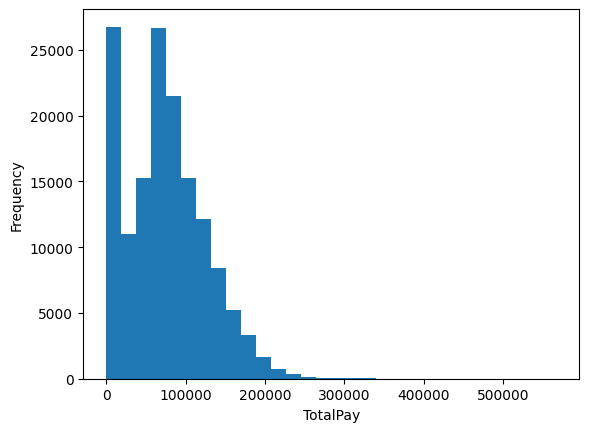

In [35]:
df['TotalPay'].plot(kind='hist',bins=30)
plt.xlabel('TotalPay')
plt.show()

In [36]:
#extract new column "name department" from job title
import re
df['Departments'] = ''
department_name= r'\w DEPARTMEN'


for index, row in df.iterrows():
     if re.search(department_name,row['JobTitle']) :
    #if department_name in row['JobTitle']:
        df.at[index,'Departments'] = row['JobTitle'].split()[-2:]

     else:
      df.at[index, 'Departments'] = 'NaN'

In [37]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Departments
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco,"[(POLICE, DEPARTMENT)]"
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco,"[(POLICE, DEPARTMENT)]"
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco,"[DEPARTMENT,(FIRE, DEPARTMENT)]"


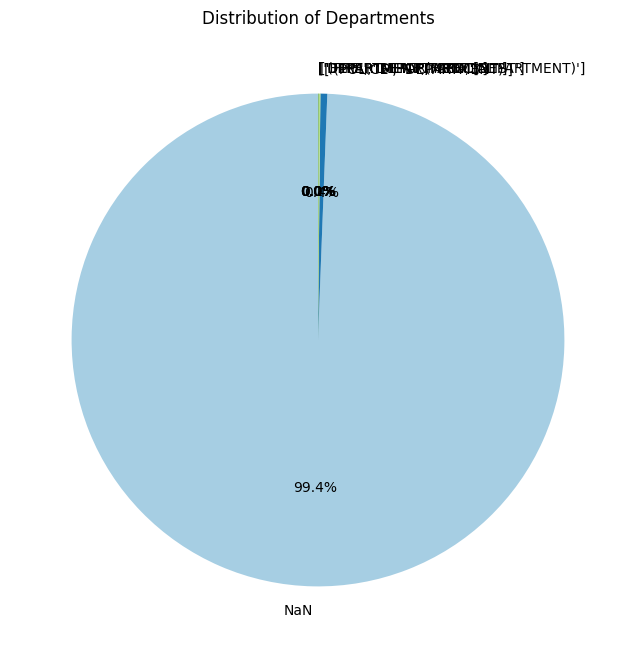

In [38]:
#proportion of employees in departments.
department_counts = df['Departments'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Departments')
plt.show()

# ***Grouped data***

In [39]:
#This code will not work due to a defect in the departments column
'''grouped_data = df.groupby('Departments')
mean = grouped_data['TotalPay'].mean()
print(mean)
mean.plot(kind='bar', title='Average Salary by Department')'''


"grouped_data = df.groupby('Departments')\nmean = grouped_data['TotalPay'].mean()\nprint(mean)\nmean.plot(kind='bar', title='Average Salary by Department')"

# **Correlation**

In [40]:
corr=df['OvertimePay'].corr(df['TotalPay'])
print(corr)

0.5048602762311213


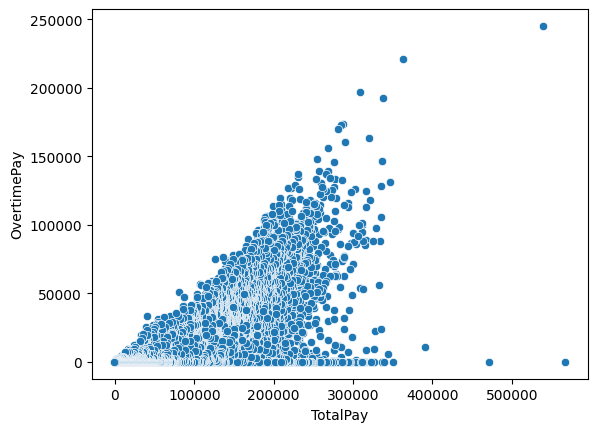

In [41]:
sns.scatterplot(x='TotalPay', y='OvertimePay',data=df)
plt.show()

# **Report**
* Note:I expect that there are some errors in the data Specifically in "job title" column, because the department name cannot be extracted from it correctly, as most of the rows do not contain the name of the department to which the employee belongs.

 After recall all the libraries we need ,reading the data and convert it to dataframe by one of the main libraries in data science(Pandas), i understood the data through several function and methods such as (df.head(),df.shape ).Then i checked if there was any missing data and filled it with neutral element 0,because cannot remove all the rows that contain missing values, because their number is large, Drop the columns that didn't contain any data,by creating histogram visualizes the distribution of salaries (total pay),by calling a library, use it to extract the name of the department in which the employee works, then insert them in a new column (departments) However, due to an error in the data, the extraction was not done correctly despite several attempts, and it also had a negative impact on data grouping. Using departments column, I created pie charts to represent the proportion of employees in different departments,also because of this error, I was unable to group the data in the departments column(it gave me errors).Finally I discovered the correlations between (OvertimePay)and(TotalPay) through scatter plot from seaborn library.
